In [1]:
data_path="./data"

In [2]:
import os
data=spark.read.csv(os.path.join(data_path, "one-million-songs/one-million-songs.csv"), header=True).rdd

In [3]:
data.toDF().show()

+--------------------+--------------------+----+---------+--------+---+-------+
|         artist_name|          track_name|year| duration|loudness|key|  tempo|
+--------------------+--------------------+----+---------+--------+---+-------+
|         Baka Beyond|Journey (Album Ve...|1995|368.14322| -11.482|  9|139.092|
|      The Fleetwoods|      Ten Times Blue|1993|175.59465| -15.193|  5|  87.65|
|        Joe Satriani|        It's So Good|2006|254.85016|  -4.707|  7| 87.875|
|                 BIZ|              Ghosts|   0|233.40363|  -5.972|  9| 97.997|
|        Memphis Slim|Baby Please Come ...|   0|110.62812|   -20.1|  5|200.962|
|        LANDA DANIEL|A KDO TEDA VODDEL...|   0|162.21995| -13.007|  9| 97.912|
|  Middle Of The Road|       Bonjour ca va|1999|188.49914|  -7.202|  2|128.033|
|           Nightwish|Over The Hills An...|2001|300.38159|  -5.401|  4|135.824|
|          Nickodemus|  Endangered Species|2008|276.53179|  -8.107|  3| 63.344|
|              Tyrese|       Gotta Get Y

In [4]:
min_tempo=88
max_tempo=150
min_year=1960
max_year=2010

resolution_tempo=max_tempo-min_tempo
resolution_year=max_year-min_year

#counts=data.map(lambda row: (row['year'] + "_"+ str(int(round(float(row['tempo'])))), 1) )
counts=data.map(lambda row: ((int(row['year']), int(float(row['tempo']))), 1)) \
  .reduceByKey(lambda x,y: x+y)  \
  .filter(lambda x: x[0][0]>=min_year and x[0][0]<max_year)  \
  .filter(lambda x: x[0][1]>=min_tempo and x[0][1]<max_tempo)


In [19]:
import numpy as np
weights=np.zeros((resolution_tempo, resolution_year))
for d in counts.collect():
  weights[d[0][1]-min_tempo][d[0][0]-min_year]=d[1]

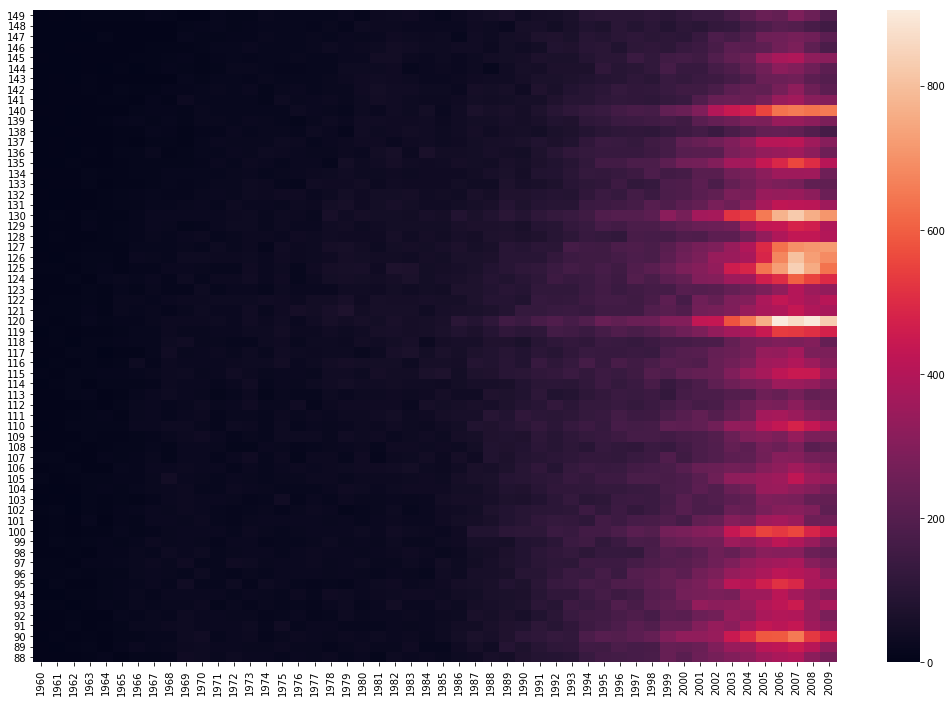

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

years=range(min_year,max_year)
tempi=range(min_tempo, max_tempo)
plt.figure(figsize=(18, 12))
ax = sns.heatmap(weights, xticklabels=years, yticklabels=tempi)
ax.invert_yaxis()

In [21]:
songs_per_year=dict(counts.map(lambda x: (x[0][0], x[1])).reduceByKey(lambda x,y: x+y).collect())

In [22]:
import numpy as np
weights=np.zeros((resolution_tempo, resolution_year))

for d in counts.collect():
  weights[d[0][1]-min_tempo][d[0][0]-min_year]=d[1]/songs_per_year[d[0][0]]

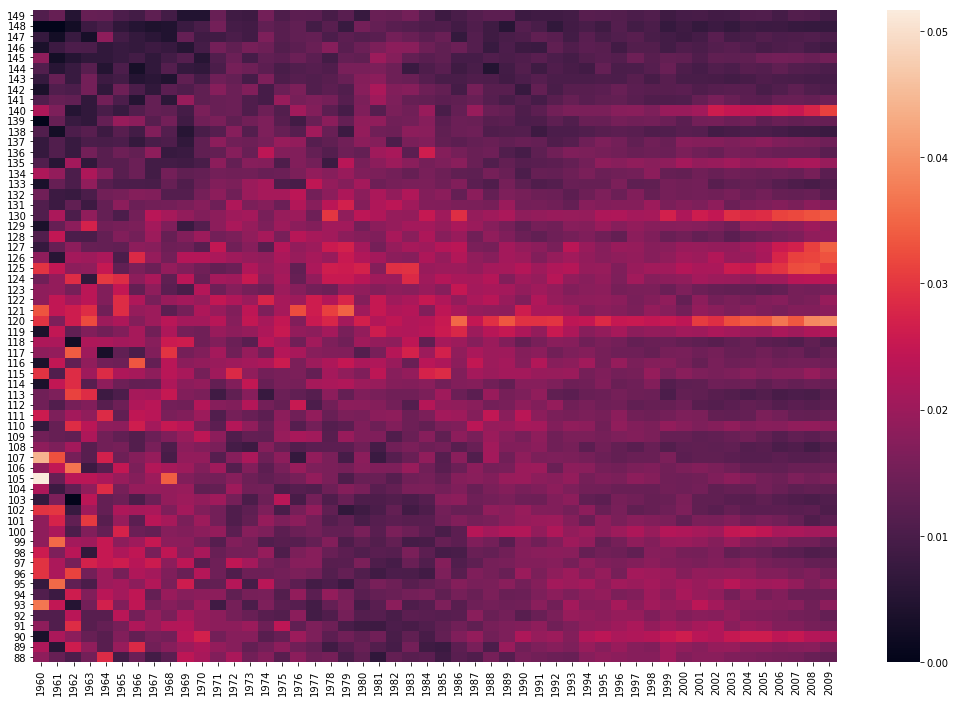

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

years=range(min_year,max_year)
tempi=range(min_tempo, max_tempo)
plt.figure(figsize=(18, 12))
ax = sns.heatmap(weights, xticklabels=years, yticklabels=tempi)
ax.invert_yaxis()

In [24]:
maxPerYear=counts.map(lambda x: (x[0][0],x[1])).reduceByKey(lambda x,y: max(x,y))

In [25]:
maxPerYearDictionary=dict(maxPerYear.collect())

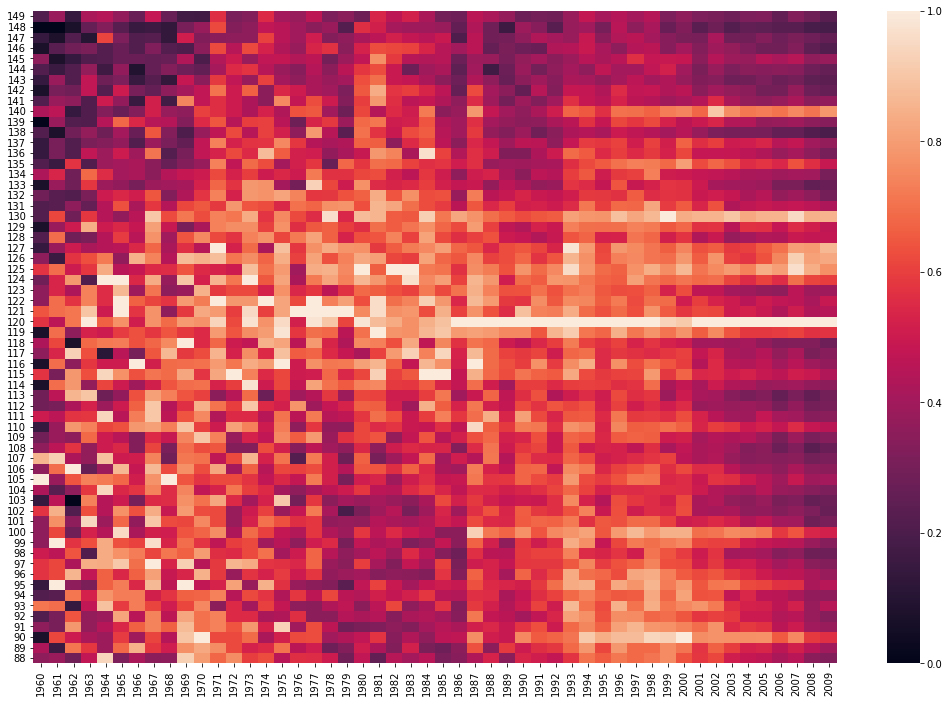

In [26]:
weightsByYear=np.zeros((resolution_tempo, resolution_year))
for d in counts.collect():
  weightsByYear[d[0][1]-min_tempo][d[0][0]-min_year]=float(d[1])/maxPerYearDictionary[d[0][0]]
plt.figure(figsize=(18, 12))
ax = sns.heatmap(weightsByYear, xticklabels=years, yticklabels=tempi)
ax.invert_yaxis()